In [3]:
import random
import time
import matplotlib.pyplot as plt
import numpy as np

class Tree: #This is a TreeNode initialization acutally
    def __init__(self,value=None):
        self._value = value
        self.left = None
        self.right = None

    def add(self, data):
        if self._value!=None:
            if data < self._value:
                if self.left is None:
                    self.left = Tree(data)
                else:
                    self.left.add(data)
            elif data > self._value:
                if self.right is None:
                    self.right = Tree(data)
                else:
                    self.right.add(data)
        else:
            self._value = data

    def __contains__(self, item):
      if self._value == item:
        return True
      elif self.left and item < self._value:
        return item in self.left
      elif self.right and item > self._value:
        return item in self.right
      else:
        return False

my_tree = Tree()
for item in [55, 62, 37, 49, 71, 14, 17]:
    my_tree.add(item)

print([my_tree.__contains__(item) for item in [55, 62, 37, 49]])
print([my_tree.__contains__(item) for item in [42, 93]])

[True, True, True, True]
[False, False]


[694748, 378514, 522588, 100277, 924190, 903729, 242991, 541443, 152158, 132713, 368188, 864468, 594903, 456367, 492690, 240581, 483872, 242765, 329009, 208801, 954767, 321556, 709706, 464202, 25877, 668538, 939023, 590075, 932620, 546890, 824109, 876310, 587258, 387425, 145823, 714392, 435461, 937623, 146835, 95379, 192670, 718675, 926038, 555948, 690266, 491208, 223198, 717803, 129175, 679817, 891516, 734089, 411653, 738789, 414418, 558148, 872131, 597150, 110172, 881423, 51819, 191603, 868919, 796307, 409991, 240766, 643947, 352283, 607604, 650885, 966796, 69915, 778671, 251613, 889640, 928982, 628407, 248297, 701489, 651903, 557524, 573972, 993915, 175984, 868794, 541287, 42328, 958372, 966774, 606369, 539697, 438145, 758901, 592700, 414171, 27509, 201412, 310149, 79264, 489791] 180487
[1.1435000001256412e-06, 9.433999998691434e-07, 7.515000002058514e-07, 8.082999997895968e-07, 1.3783999997940554e-06, 1.0345999999117339e-06, 1.6100999996524478e-06, 2.696699999887642e-06, 1.24779999

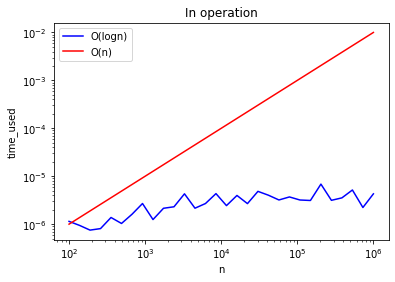

In [19]:
N=np.logspace(2,6,30,endpoint=True)
'Randomly sample from integers ranging from 0 to 10^6'
Treelist=[random.sample(range(0,1000000), int(n)) for n in N]
'Fix test sample'
Findsample=random.sample(range(0,10000000), 1000)
print(Treelist[0],Findsample[0])

timeused_N=[]
for i in range(len(N)):
    tree_generate=Tree()
    for item in Treelist[i]:
        tree_generate.add(item)
    starttime=time.perf_counter()
    for item in Findsample:
        tree_generate.__contains__(item)
    endtime=time.perf_counter()
    timeused=endtime-starttime
    timeused_N.append(timeused/1000)
# print(timeused_N)

plt.axes(xscale='log',yscale='log')
plt.plot(N,timeused_N,color='b',label='O(logn)')
plt.plot(N,N*1e-8,color='r',label='O(n)')
plt.xlabel('n')
plt.ylabel('time_used')
plt.title('In operation')
plt.legend()
plt.savefig('containtree.jpg')
plt.show()

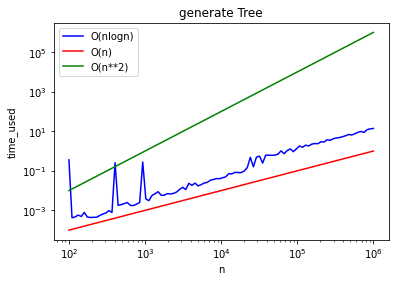

In [15]:
N=np.logspace(2,6,100,endpoint=True)
Treelist=[random.sample(range(0,1000000), int(n)) for n in N]
timegenerate_N=[]
for i in range(0,len(N)):
    starttime=time.perf_counter()
    tree_generate=Tree()
    for item in Treelist[i]:
        tree_generate.add(item)
    endtime=time.perf_counter()
    timeused=endtime-starttime
    timegenerate_N.append(timeused)
plt.axes(xscale='log',yscale='log')
plt.xlabel('n')
plt.ylabel('time_used')
plt.plot(N,timegenerate_N,color='b',label='O(nlogn)')
plt.plot(N,N*1e-6,color='r',label='O(n)')
plt.plot(N,N**2*1e-6,color='g',label='O(n**2)')
plt.title('generate Tree')
plt.legend()
plt.savefig('generateTime.jpg')
plt.show()